In [1]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import mplhep
from matplotlib.colors import LogNorm
#plt.style.use(mplhep.style.CMS)

# Signal

In [2]:
df = None
event_counts = None
selections_str = None
#with h5py.File('output/output-MC2017-Elastic-PreSel.h5', 'r') as f:
#with h5py.File('output/output-MC2017-Elastic-ExclSel.h5', 'r') as f:
with h5py.File('output/output-MC2017-SingleDissociation-PreSel.h5', 'r') as f:
#with h5py.File('output/output-MC2017-SingleDissociation-ExclSel.h5', 'r') as f:    
    print ( list(f.keys()) )
    dset = f['protons']
    print ( dset.shape )
    print ( dset[:,:] )
    dset_columns = f['columns']
    print ( dset_columns.shape )
    columns = list( dset_columns )
    print ( columns )
    columns_str = [ item.decode("utf-8") for item in columns ]
    print ( columns_str )
    
    dset_counts = f['event_counts']
    event_counts = list( dset_counts )
    print ( event_counts )
    
    dset_selections = f['selections']
    selections_ = list( dset_selections )
    print ( selections_ )
    selections_str = [ item.decode("utf-8") for item in selections_ ]
    print ( selections_str )
    
    df = pd.DataFrame( dset, columns=columns_str )
    
    print ( df )

['columns', 'event_counts', 'protons', 'selections']
(131455, 28)
[[1.00000000e+00 1.00000000e+00 4.29496730e+09 ... 2.18745663e-04
  1.11441655e-01 1.88330499e-03]
 [1.00000000e+00 1.00000000e+00 4.29496730e+09 ... 2.18745663e-04
  1.11441655e-01 1.88330499e-03]
 [1.00000000e+00 1.00000000e+00 4.29496730e+09 ... 2.18745663e-04
  1.11441655e-01 1.88330499e-03]
 ...
 [1.00000000e+00 2.25000000e+02 4.29496730e+09 ... 1.93572367e-03
  7.67421414e-02 3.88485338e-03]
 [1.00000000e+00 2.25000000e+02 4.29496730e+09 ... 1.93572367e-03
  7.67421414e-02 3.88485338e-03]
 [1.00000000e+00 2.25000000e+02 4.29496730e+09 ... 1.93572367e-03
  7.67421414e-02 3.88485338e-03]]
(28,)
[b'Run', b'LumiSection', b'BX', b'EventNum', b'CrossingAngle', b'Xi', b'MultiRP', b'Arm', b'RPId1', b'RPId2', b'TrackX1', b'TrackY1', b'TrackX2', b'TrackY2', b'Muon0Pt', b'Muon0Eta', b'Muon0Phi', b'Muon0VtxZ', b'Muon1Pt', b'Muon1Eta', b'Muon1Phi', b'Muon1VtxZ', b'PrimVertexZ', b'InvMass', b'ExtraPfCands', b'Acopl', b'XiMuMuPlu

In [3]:
df_counts = pd.Series( event_counts, index=selections_str);
df_counts

Muon       169697
Vertex     158616
Protons     56318
dtype: int64

In [4]:
msk_invmass = ( df["InvMass"] >= 110. )
df = df[msk_invmass]
df

,Run,LumiSection,BX,EventNum,CrossingAngle,Xi,MultiRP,Arm,RPId1,RPId2,...,Muon1Pt,Muon1Eta,Muon1Phi,Muon1VtxZ,PrimVertexZ,InvMass,ExtraPfCands,Acopl,XiMuMuPlus,XiMuMuMinus
0,1.0,1.0,4.294967e+09,3.0,-999.0,0.119066,0.0,-999.0,3.0,-1.0,...,90.351357,2.261688,1.928109,0.428011,0.424056,188.305266,1.0,0.000219,0.111442,0.001883
1,1.0,1.0,4.294967e+09,3.0,-999.0,0.119145,0.0,-999.0,23.0,-1.0,...,90.351357,2.261688,1.928109,0.428011,0.424056,188.305266,1.0,0.000219,0.111442,0.001883
2,1.0,1.0,4.294967e+09,3.0,-999.0,0.118032,1.0,0.0,3.0,23.0,...,90.351357,2.261688,1.928109,0.428011,0.424056,188.305266,1.0,0.000219,0.111442,0.001883
3,1.0,1.0,4.294967e+09,16.0,-999.0,0.034712,0.0,-999.0,123.0,-1.0,...,84.741302,-0.804569,1.585272,0.786427,0.783221,171.209068,0.0,0.002544,0.005162,0.033602
4,1.0,1.0,4.294967e+09,15.0,-999.0,0.024113,0.0,-999.0,23.0,-1.0,...,54.763481,-1.060142,-1.017995,-3.671344,-3.675518,225.314067,0.0,0.002158,0.023009,0.013057
5,1.0,1.0,4.294967e+09,17.0,-999.0,0.030202,0.0,-999.0,3.0,-1.0,...,77.358459,-1.278425,-1.259489,4.341810,4.341201,288.467135,6.0,0.698762,0.026775,0.023218
6,1.0,1.0,4.294967e+09,17.0,-999.0,0.031193,0.0,-999.0,23.0,-1.0,...,77.358459,-1.278425,-1.259489,4.341810,4.341201,288.467135,6.0,0.698762,0.026775,0.023218
7,1.0,1.0,4.294967e+09,20.0,-999.0,0.049879,0.0,-999.0,103.0,-1.0,...,115.335823,-1.117552,-2.905547,-2.884175,-2.886598,246.306463,0.0,0.036674,0.006029,0.060007
8,1.0,1.0,4.294967e+09,20.0,-999.0,0.048426,0.0,-999.0,123.0,-1.0,...,115.335823,-1.117552,-2.905547,-2.884175,-2.886598,246.306463,0.0,0.036674,0.006029,0.060007
9,1.0,1.0,4.294967e+09,20.0,-999.0,0.058108,1.0,1.0,103.0,123.0,...,115.335823,-1.117552,-2.905547,-2.884175,-2.886598,246.306463,0.0,0.036674,0.006029,0.060007


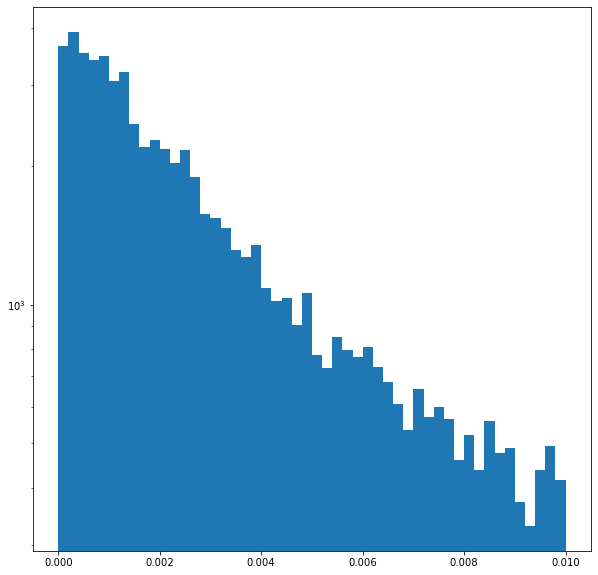

In [5]:
fig = plt.figure( figsize=(10,10) )
plt.hist( df["Acopl"], bins=50, range=(0.,0.01) )
plt.yscale( "log" )

(array([68546., 25504., 11258.,  5948.,  3334.,  2329.,  1660.,  1264.,
          929.,   707.,   555.,   455.,   336.,   257.,   276.,   236.,
          176.,   171.,   161.,   268.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20.]),
 <a list of 20 Patch objects>)

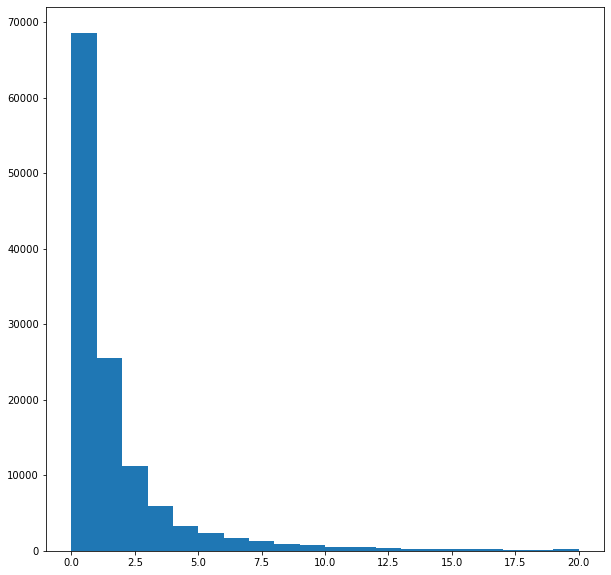

In [6]:
fig = plt.figure( figsize=(10,10) )
plt.hist( df["ExtraPfCands"], bins=20, range=(0.,20) )
#plt.yscale( "log" )

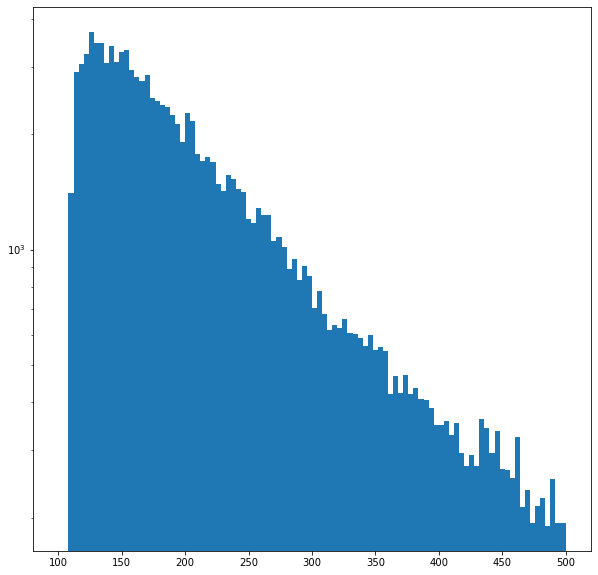

In [7]:
fig = plt.figure( figsize=(10,10) )
plt.hist( df["InvMass"], bins=100, range=(100.,500) )
plt.yscale( "log" )

12530 8958


(0.0, 0.15)

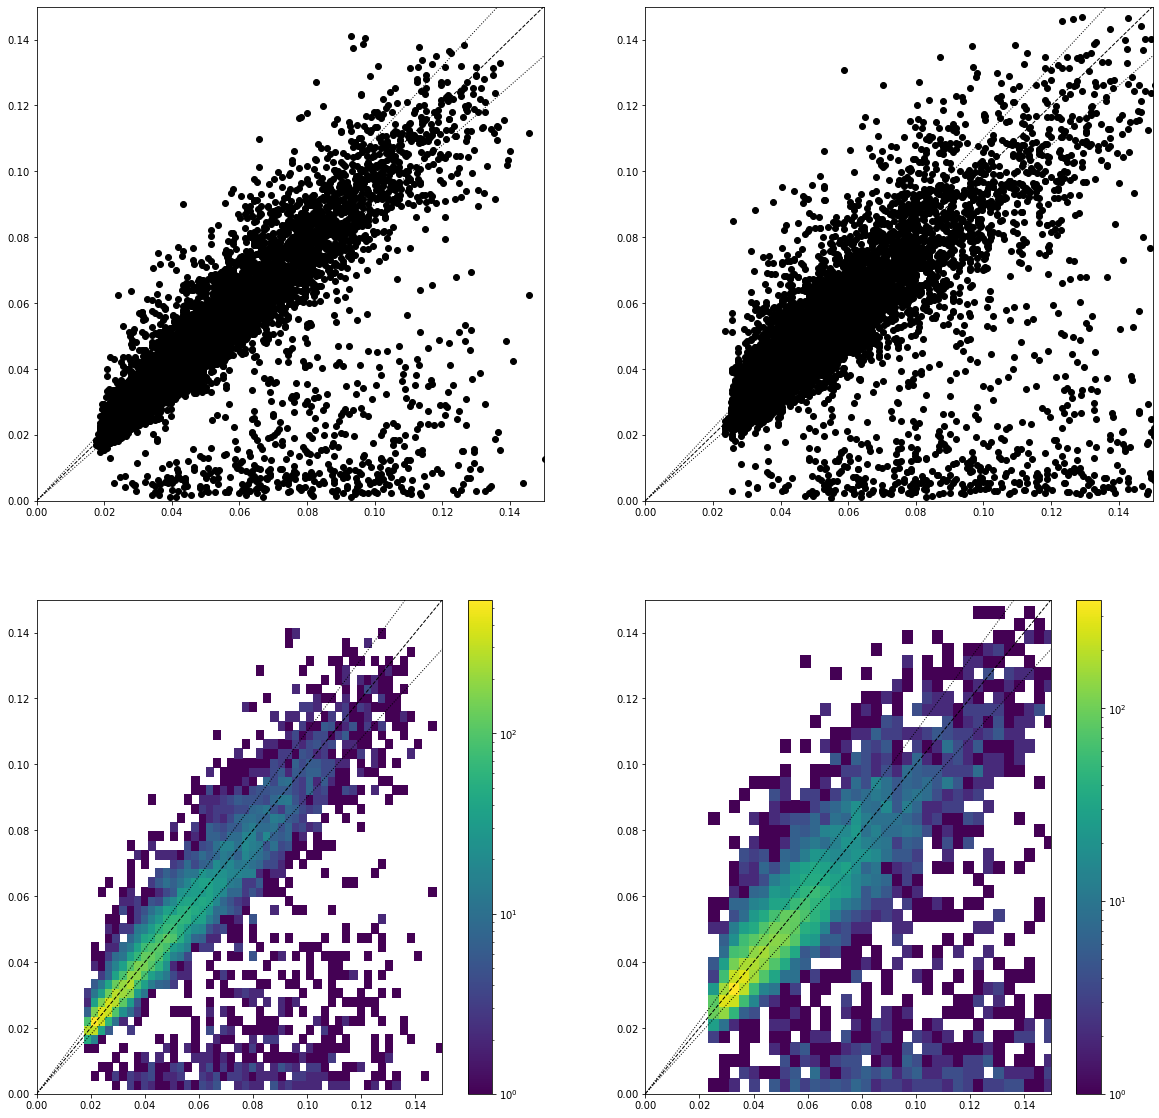

In [8]:
msk_excl = ( df["InvMass"] >= 110. ) & ( df["Acopl"] <= 0.009 ) & ( df["ExtraPfCands"] <= 1 )
msk1 = msk_excl & ( df["MultiRP"] == 0) & ( df["RPId1"] == 23 )
msk2 = msk_excl & ( df["MultiRP"] == 0) & ( df["RPId1"] == 123 )
#msk1 = msk_excl & ( df["MultiRP"] == 1 ) & ( df["Arm"] == 0 )
#msk2 = msk_excl & ( df["MultiRP"] == 1 ) & ( df["Arm"] == 1 )

print ( len(df[ "Xi" ][ msk1 ]), len(df[ "Xi" ][ msk2 ]) )

fig, axes = plt.subplots( 2, 2, figsize=(20,20) )
axes[0,0].plot( df[ "Xi" ][ msk1 ], df[ "XiMuMuPlus" ][ msk1 ], 'ko' )
axes[0,0].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[0,0].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[0,0].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[0,0].set_xlim(0.,0.15)
axes[0,0].set_ylim(0.,0.15)
axes[0,1].plot( df[ "Xi" ][ msk2 ], df[ "XiMuMuMinus" ][ msk2 ], 'ko' )
axes[0,1].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[0,1].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[0,1].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[0,1].set_xlim(0.,0.15)
axes[0,1].set_ylim(0.,0.15)
counts, xedges, yedges, im = axes[1,0].hist2d( df[ "Xi" ][ msk1 ], df[ "XiMuMuPlus" ][ msk1 ], bins=(50,50), norm=LogNorm(), cmap='viridis' )
fig.colorbar(im, ax=axes[1,0])
axes[1,0].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[1,0].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[1,0].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[1,0].set_xlim(0.,0.15)
axes[1,0].set_ylim(0.,0.15)
counts, xedges, yedges, im = axes[1,1].hist2d( df[ "Xi" ][ msk2 ], df[ "XiMuMuMinus" ][ msk2 ], bins=(50,50), norm=LogNorm(), cmap='viridis' )
fig.colorbar(im, ax=axes[1,1])
axes[1,1].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[1,1].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[1,1].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[1,1].set_xlim(0.,0.15)
axes[1,1].set_ylim(0.,0.15)

# Data

In [9]:
df_data = None
event_counts_data = None
selections_str_data = None

with h5py.File('output/output-UL2017B-PreSel.h5', 'r') as f:
#with h5py.File('output/output-UL2017B-Excl.h5', 'r') as f:    
#with h5py.File('output/output-UL2017C1-PreSel.h5', 'r') as f:
#with h5py.File('output/output-UL2017C1-Excl.h5', 'r') as f:
    print ( list(f.keys()) )
    dset = f['protons']
    print ( dset.shape )
    print ( dset[:,:] )
    dset_columns = f['columns']
    print ( dset_columns.shape )
    columns = list( dset_columns )
    print ( columns )
    columns_str = [ item.decode("utf-8") for item in columns ]
    print ( columns_str )

    dset_counts = f['event_counts']
    event_counts_data = list( dset_counts )
    print ( event_counts_data )
    
    dset_selections = f['selections']
    selections_ = list( dset_selections )
    print ( selections_ )
    selections_str_data = [ item.decode("utf-8") for item in selections_ ]
    print ( selections_str_data )  
    df_data = pd.DataFrame( dset, columns=columns_str )

    print ( df_data )

['columns', 'event_counts', 'protons', 'selections']
(107075, 28)
[[2.97227000e+05 5.30000000e+01 2.29700000e+03 ... 9.83012105e-01
  5.61954090e-02 4.09129155e-03]
 [2.97227000e+05 5.50000000e+01 8.67000000e+02 ... 1.32611728e-01
  1.95323438e-03 4.83462101e-02]
 [2.97227000e+05 5.50000000e+01 8.67000000e+02 ... 1.32611728e-01
  1.95323438e-03 4.83462101e-02]
 ...
 [2.99062000e+05 1.33000000e+02 1.72100000e+03 ... 6.64818845e-01
  3.52177158e-03 7.56784159e-02]
 [2.99062000e+05 1.33000000e+02 1.72100000e+03 ... 6.64818845e-01
  3.52177158e-03 7.56784159e-02]
 [2.99062000e+05 1.33000000e+02 1.72100000e+03 ... 6.64818845e-01
  3.52177158e-03 7.56784159e-02]]
(28,)
[b'Run', b'LumiSection', b'BX', b'EventNum', b'CrossingAngle', b'Xi', b'MultiRP', b'Arm', b'RPId1', b'RPId2', b'TrackX1', b'TrackY1', b'TrackX2', b'TrackY2', b'Muon0Pt', b'Muon0Eta', b'Muon0Phi', b'Muon0VtxZ', b'Muon1Pt', b'Muon1Eta', b'Muon1Phi', b'Muon1VtxZ', b'PrimVertexZ', b'InvMass', b'ExtraPfCands', b'Acopl', b'XiMuMuPlu

In [10]:
df_counts_data = pd.Series( event_counts_data, index=selections_str_data);
df_counts_data

Muon       47151
Vertex     44057
Protons    32009
dtype: int64

In [11]:
msk_invmass = ( df_data["InvMass"] >= 110. )
df_data = df_data[msk_invmass]
df_data

,Run,LumiSection,BX,EventNum,CrossingAngle,Xi,MultiRP,Arm,RPId1,RPId2,...,Muon1Pt,Muon1Eta,Muon1Phi,Muon1VtxZ,PrimVertexZ,InvMass,ExtraPfCands,Acopl,XiMuMuPlus,XiMuMuMinus
1,297227.0,55.0,867.0,38079658.0,120.0,0.055317,0.0,-999.0,103.0,-1.0,...,62.493637,-1.693658,-0.273957,-0.406477,-0.412115,123.616515,27.0,0.132612,0.001953,0.048346
2,297227.0,55.0,867.0,38079658.0,120.0,0.053598,0.0,-999.0,123.0,-1.0,...,62.493637,-1.693658,-0.273957,-0.406477,-0.412115,123.616515,27.0,0.132612,0.001953,0.048346
3,297227.0,55.0,867.0,38079658.0,120.0,0.067306,1.0,1.0,103.0,123.0,...,62.493637,-1.693658,-0.273957,-0.406477,-0.412115,123.616515,27.0,0.132612,0.001953,0.048346
4,297227.0,56.0,1102.0,38791639.0,120.0,0.098331,0.0,-999.0,103.0,-1.0,...,65.022888,-1.087328,-0.051032,-1.935442,-1.928177,152.786010,29.0,0.058782,0.002211,0.062855
5,297227.0,56.0,1102.0,38791639.0,120.0,0.097884,0.0,-999.0,123.0,-1.0,...,65.022888,-1.087328,-0.051032,-1.935442,-1.928177,152.786010,29.0,0.058782,0.002211,0.062855
6,297227.0,56.0,1102.0,38791639.0,120.0,0.102869,1.0,1.0,103.0,123.0,...,65.022888,-1.087328,-0.051032,-1.935442,-1.928177,152.786010,29.0,0.058782,0.002211,0.062855
18,297227.0,59.0,1091.0,41195314.0,120.0,0.054267,0.0,-999.0,3.0,-1.0,...,53.397972,0.351230,1.455985,1.699705,1.701242,115.758900,30.0,0.476683,0.007220,0.015363
19,297227.0,59.0,1091.0,41195314.0,120.0,0.030869,0.0,-999.0,23.0,-1.0,...,53.397972,0.351230,1.455985,1.699705,1.701242,115.758900,30.0,0.476683,0.007220,0.015363
23,297227.0,60.0,2102.0,41478175.0,120.0,0.032062,0.0,-999.0,123.0,-1.0,...,93.884605,-0.780826,-1.171839,-2.750041,-2.746576,323.668558,40.0,0.157789,0.035037,0.018197
37,297227.0,71.0,517.0,50687027.0,120.0,0.047071,0.0,-999.0,3.0,-1.0,...,113.611771,-1.225648,2.078576,3.568076,3.565264,270.992400,27.0,0.016921,0.010428,0.041786


(array([3214., 3016., 2699., 2860., 2357., 2117., 1694., 1657., 1584.,
        1462., 1269., 1089.,  988., 1027.,  857.,  737.,  769.,  734.,
         695.,  710.,  593.,  515.,  553.,  545.,  465.,  468.,  389.,
         466.,  390.,  388.,  371.,  364.,  358.,  375.,  375.,  329.,
         286.,  278.,  321.,  278.,  250.,  232.,  214.,  256.,  224.,
         216.,  202.,  222.,  173.,  209.]),
 array([0.   , 0.004, 0.008, 0.012, 0.016, 0.02 , 0.024, 0.028, 0.032,
        0.036, 0.04 , 0.044, 0.048, 0.052, 0.056, 0.06 , 0.064, 0.068,
        0.072, 0.076, 0.08 , 0.084, 0.088, 0.092, 0.096, 0.1  , 0.104,
        0.108, 0.112, 0.116, 0.12 , 0.124, 0.128, 0.132, 0.136, 0.14 ,
        0.144, 0.148, 0.152, 0.156, 0.16 , 0.164, 0.168, 0.172, 0.176,
        0.18 , 0.184, 0.188, 0.192, 0.196, 0.2  ]),
 <a list of 50 Patch objects>)

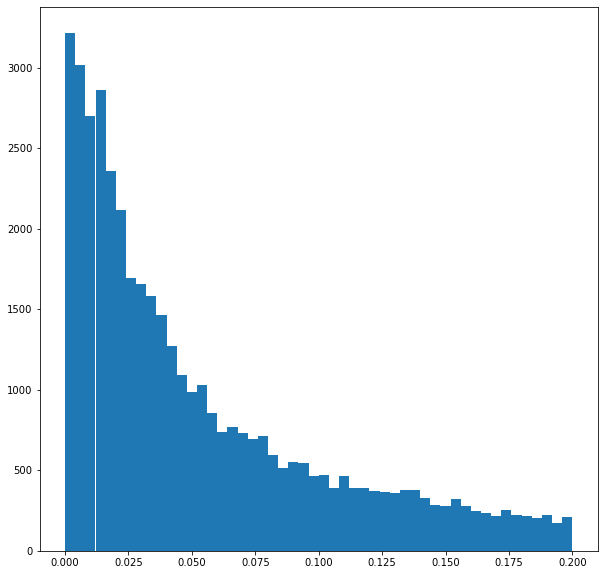

In [12]:
fig = plt.figure( figsize=(10,10) )
plt.hist( df_data["Acopl"], bins=50, range=(0.,0.2) )
#plt.yscale( "log" )

(array([ 142.,  139.,  168.,  269.,  288.,  312.,  279.,  443.,  449.,
         540.,  530.,  625.,  626.,  616.,  671.,  854.,  874.,  746.,
         904.,  968.,  934.,  993., 1078., 1066., 1023.,  972.,  979.,
         976., 1039., 2041.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30.]),
 <a list of 30 Patch objects>)

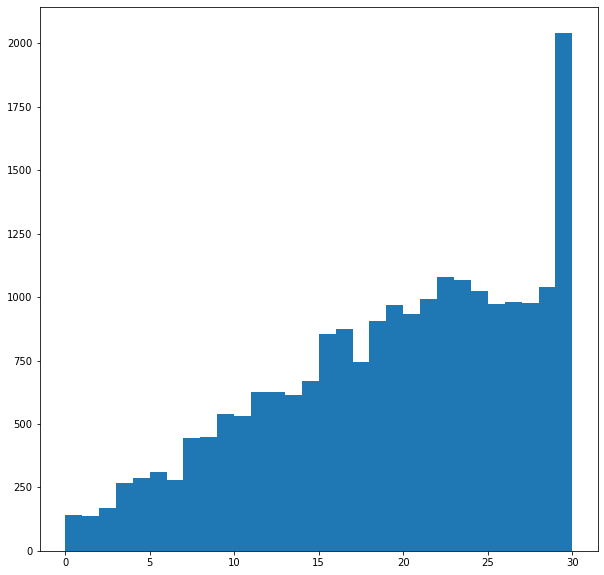

In [13]:
fig = plt.figure( figsize=(10,10) )
plt.hist( df_data["ExtraPfCands"], bins=30, range=(0.,30) )
#plt.yscale( "log" )

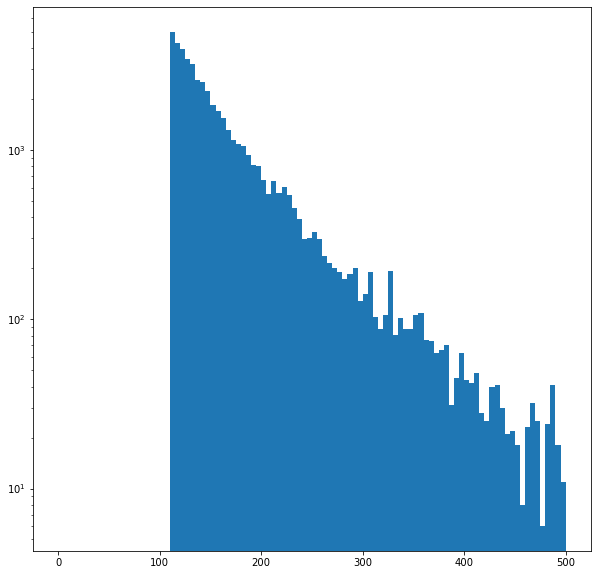

In [14]:
fig = plt.figure( figsize=(10,10) )
plt.hist( df_data["InvMass"], bins=100, range=(0.,500) )
plt.yscale( "log" )

55 47


(0.0, 0.15)

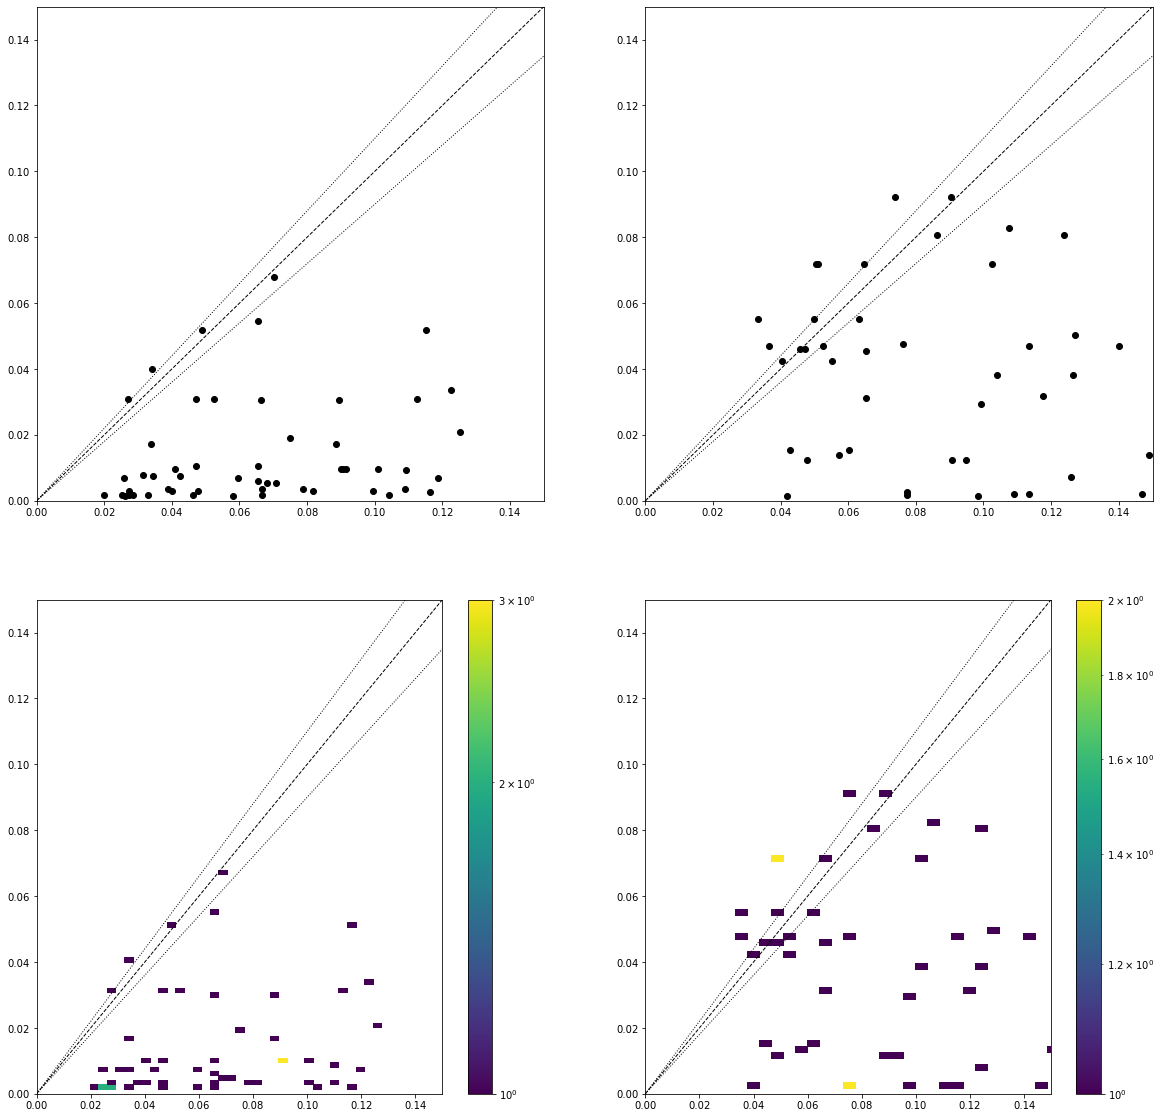

In [15]:
msk_excl = ( df_data["InvMass"] >= 110. ) & ( df_data["Acopl"] <= 0.009 ) & ( df_data["ExtraPfCands"] <= 1 )
msk1 = msk_excl & ( df_data["MultiRP"] == 0 ) & ( df_data["RPId1"] == 23 )
msk2 = msk_excl & ( df_data["MultiRP"] == 0 ) & ( df_data["RPId1"] == 123 )
#msk1 = msk_excl & ( df_data["MultiRP"] == 1 ) & ( df_data["Arm"] == 0 )
#msk2 = msk_excl & ( df_data["MultiRP"] == 1 ) & ( df_data["Arm"] == 1 )

print ( len(df_data[ "Xi" ][ msk1 ]), len(df_data[ "Xi" ][ msk2 ]) )

fig, axes = plt.subplots( 2, 2, figsize=(20,20) )
axes[0,0].plot( df_data[ "Xi" ][ msk1 ], df_data[ "XiMuMuPlus" ][ msk1 ], 'ko' )
axes[0,0].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[0,0].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[0,0].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[0,0].set_xlim(0.,0.15)
axes[0,0].set_ylim(0.,0.15)
axes[0,1].plot( df_data[ "Xi" ][ msk2 ], df_data[ "XiMuMuMinus" ][ msk2 ], 'ko' )
axes[0,1].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[0,1].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[0,1].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[0,1].set_xlim(0.,0.15)
axes[0,1].set_ylim(0.,0.15)
counts, xedges, yedges, im = axes[1,0].hist2d( df_data[ "Xi" ][ msk1 ], df_data[ "XiMuMuPlus" ][ msk1 ], bins=(50,50), norm=LogNorm(), cmap='viridis' )
fig.colorbar(im, ax=axes[1,0])
axes[1,0].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[1,0].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[1,0].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[1,0].set_xlim(0.,0.15)
axes[1,0].set_ylim(0.,0.15)
counts, xedges, yedges, im = axes[1,1].hist2d( df_data[ "Xi" ][ msk2 ], df_data[ "XiMuMuMinus" ][ msk2 ], bins=(50,50), norm=LogNorm(), cmap='viridis' )
fig.colorbar(im, ax=axes[1,1])
axes[1,1].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[1,1].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[1,1].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[1,1].set_xlim(0.,0.15)
axes[1,1].set_ylim(0.,0.15)